#### Analyze the mapping quality of E-MTAB-8901
- **Developed by:** Anna Maguza
- **Affilation:** Faculty of Medicine, Würzburg University
- **Created date:** 23th October 2024
- **Last modified dte:** 23th October 2024

This notebook is created to check the quality of the mapping from E-MTAB-8901 study. In this notebook we are visualizing `StarSolo` mapping metrics. 

+ Import packages

In [107]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

+ Some samples had UMI length 12, and some ten, therefore the mapping script tried both options, and ended up in generation of two Log.progress.out files but one is empty. The following function indents to choose the correct file by analyzing file size.

In [108]:
def get_log_file(sample_dir):
    umi10_log = os.path.join(sample_dir, "UMI10_Log.progress.out")
    umi12_log = os.path.join(sample_dir, "UMI12_Log.progress.out")
    
    if os.path.exists(umi12_log) and os.path.getsize(umi12_log) > 1000:
        return umi12_log
    elif os.path.exists(umi10_log) and os.path.getsize(umi10_log) > 1000:
        return umi10_log
    else:
        return None

+ Transform Log.progress.out file to dataframe

In [109]:
def process_sample(sample_dir):
    log_file = get_log_file(sample_dir)
    if log_file is None:
        print(f"Warning: No valid mapping log found for sample {os.path.basename(sample_dir)}")
        return None
    
    try:
        # Read the file, skipping the header rows
        df = pd.read_csv(log_file, sep='\s+', skiprows=2,
                        names=['Month', 'Day', 'Time', 'Speed', 'Number', 'Length', 
                              'Mapped_unique', 'Mapped_length', 'Mapped_MMrate', 
                              'Mapped_multi', 'Unmapped_multi+', 'Unmapped_MM', 
                              'Unmapped_short', 'Unmapped_other'])
        
        # Convert percentage columns to float
        percentage_columns = ['Mapped_unique', 'Mapped_MMrate', 'Mapped_multi',
                            'Unmapped_multi+', 'Unmapped_MM', 'Unmapped_short', 
                            'Unmapped_other']
        
        for col in percentage_columns:
            df[col] = df[col].str.rstrip('%').astype('float') / 100.0
        
        # Convert numeric columns
        df['Mapped_length'] = pd.to_numeric(df['Mapped_length'])
        
        # Calculate means for the metrics of interest
        metrics_of_interest = ['Mapped_unique', 'Mapped_length', 'Mapped_MMrate',
                             'Mapped_multi', 'Unmapped_multi+', 'Unmapped_MM',
                             'Unmapped_short', 'Unmapped_other']
        
        mean_values = df[metrics_of_interest].mean()
        return mean_values
        
    except Exception as e:
        print(f"Error processing {log_file}: {str(e)}")
        return None

In [110]:
BASE_DIR = "/mnt/LaCIE/annaM/gut_project/raw_data/Elmentaite_2021/remapped_fetal_data_E-MTAB-8901_starsolo"

In [112]:
sample_dirs = glob.glob(os.path.join(BASE_DIR, "*"))
results = {}
for sample_dir in sample_dirs:
    sample_name = os.path.basename(sample_dir)
    print(f"Processing sample: {sample_name}")
        
    mean_values = process_sample(sample_dir)
    if mean_values is not None:
        results[sample_name] = mean_values

Processing sample: 4918STDY7274839
Processing sample: 4918STDY7718977
Processing sample: 4918STDY7421298
Processing sample: 4918STDY7317585
Processing sample: 4918STDY7426911
Processing sample: 4918STDY8366756
Processing sample: 4918STDY7718972
Processing sample: 4918STDY7693762
Processing sample: 4918STDY7718976
Processing sample: 4918STDY7717788
Processing sample: 4918STDY7273965
Processing sample: 4918STDY7901096
Processing sample: 4918STDY7693760
Processing sample: 4918STDY8366754
Processing sample: 4918STDY7321515
Processing sample: 4918STDY7426907
Processing sample: 4918STDY7590324
Processing sample: 4918STDY7962470
Processing sample: 4918STDY7693759
Processing sample: 4918STDY7693763
Processing sample: 4918STDY7426908
Processing sample: 4918STDY7702680
Processing sample: 4918STDY7426906
Processing sample: 4918STDY7718974
Processing sample: 4918STDY7923744
Processing sample: 4918STDY7718973
Processing sample: 4918STDY7717784
Processing sample: 4918STDY7590325
Processing sample: 4

In [113]:
results_df = pd.DataFrame(results).T

In [115]:
results_df

,Mapped_unique,Mapped_length,Mapped_MMrate,Mapped_multi,Unmapped_multi+,Unmapped_MM,Unmapped_short,Unmapped_other
4918STDY7274839,0.780333,95.400000,0.007095,0.132714,0.002000,0.0,0.068048,0.016905
4918STDY7421298,0.799500,96.700000,0.004875,0.166000,0.001000,0.0,0.029125,0.005000
4918STDY7317585,0.765000,95.904762,0.005000,0.145571,0.008000,0.0,0.072238,0.009000
4918STDY8366756,0.803571,94.100000,0.003857,0.150429,0.001000,0.0,0.037857,0.007000
4918STDY7693762,0.800682,96.900000,0.006000,0.155227,0.002000,0.0,0.038182,0.004000
4918STDY7717788,0.799591,95.886364,0.005500,0.152773,0.002000,0.0,0.039682,0.006000
4918STDY7273965,0.757500,96.500000,0.008889,0.152222,0.003611,0.0,0.081722,0.005000
4918STDY7693760,0.789545,96.800000,0.005045,0.168182,0.001000,0.0,0.036045,0.005000
4918STDY8366754,0.788000,94.100000,0.004000,0.164571,0.001000,0.0,0.040714,0.006000
4918STDY7321515,0.750333,95.428571,0.005857,0.142000,0.005000,0.0,0.087381,0.015667


In [116]:
output_file = os.path.join(BASE_DIR, "mapping_metrics_summary.csv")
results_df.to_csv(output_file)

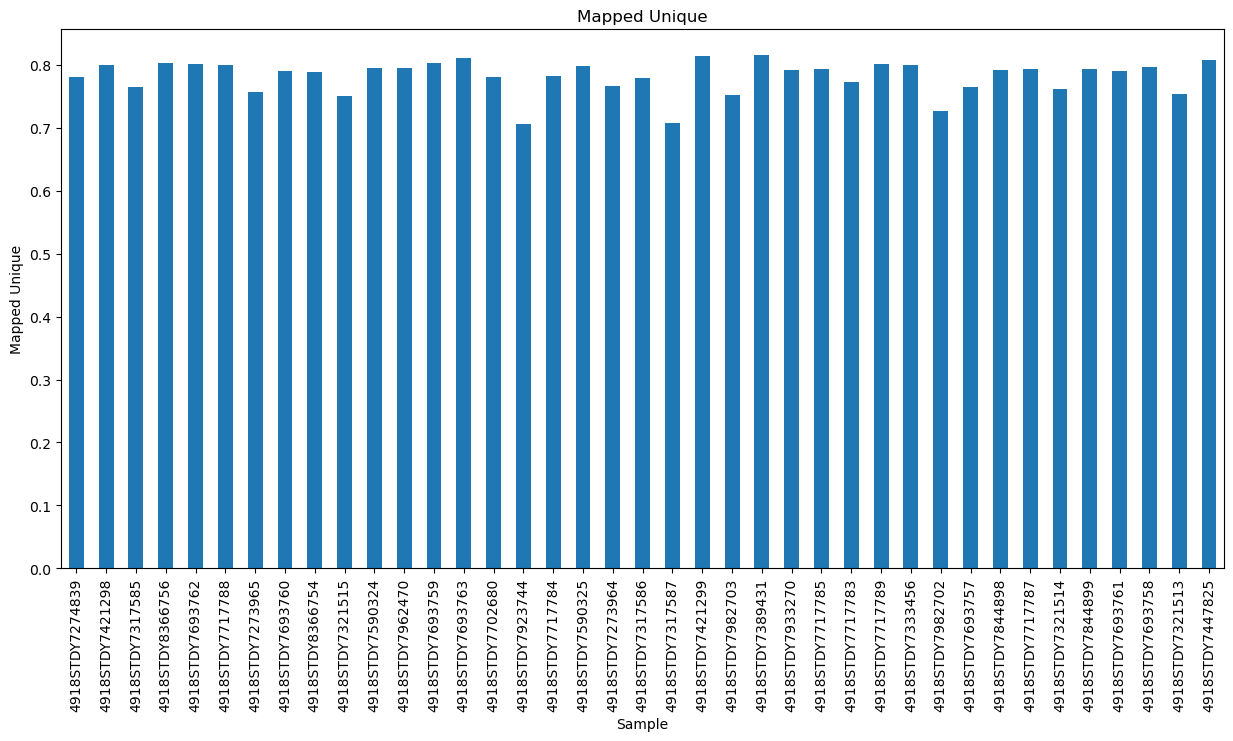

In [118]:
results_df['Mapped_unique'].plot(kind='bar', figsize=(15, 7), title='Mapped Unique')
plt.xlabel('Sample')
plt.ylabel('Mapped Unique')
plt.xticks(rotation=90)
plt.show()